In [2]:
import pandas as pd
import numpy as np
import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (7.0, 10.0)

/Users/markshilton/anaconda/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
def parse_time(raw_time):
    '''Parse the raw time strings into timedeltas for doing arithmetic on the times'''
    if raw_time == '' or None:
        return None
    else:
        try:
            dt = datetime.datetime.strptime(str(raw_time), '%M:%S.%f')
            timedelta = datetime.timedelta(minutes=dt.minute, seconds=dt.second, microseconds=dt.microsecond)
            return timedelta
        except:
            dt = datetime.datetime.strptime(str(raw_time), '%S.%f')
            timedelta = datetime.timedelta(seconds=dt.second, microseconds=dt.microsecond)
            return timedelta


def timedeltaToString(rawTd):
    '''Convert timedelta to a MM:SS.000 formatted string'''
    try:
        dt = str(rawTd)[-12:-3]
        return dt
    except:
        return None

In [4]:
def processResults(df):
    '''Calculate split times, time gaps and rankings for each rider'''
    #Apply the time parser to the raw times
    for i in range(1,6):
        df['split' + str(i)] = df['split' + str(i)].apply(parse_time)

    #Calculate the total sector times for each split
    df['sector1'] = df['split1']
    df['sector2'] = df['split2'] - df['split1']
    df['sector3'] = df['split3'] - df['split2']
    df['sector4'] = df['split4'] - df['split3']
    df['sector5'] = df['split5'] - df['split4']

    #Calculate the time gaps and rankings for everything
    cols = ['sector1', 'sector2', 'sector3','sector4', 'sector5', 'split1', 'split2', 'split3','split4', 'split5']

    for col in cols:
        df[col + 'Gap'] = df[col].apply(lambda x: (x - df[col].min())/np.timedelta64(1,'s'))
        df[col + 'Rank'] = df[col].rank().astype(int)
        df[col] = df[col].apply(timedeltaToString)
        df[col + 'Rank']

    return df

In [6]:
df_raw = pd.read_excel('Results_MontSaintAnne.xlsx')
df_raw.reset_index(inplace=True)
df_raw.head()

,index,Rank,Unnamed: 1,N°,UCI Code,Name / UCI MTB Team,Speed,Split 1 & 2,Unnamed: 7,Split 3 & 4,Unnamed: 9,Unnamed: 10,Time,Gap,Pts
0,0,1.0,P,2.0,GBR19910920,HART Danny,NaN,NaN,49.902,(1),2:42.832,(1),NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,73.282,(8),NaN,NaN,NaN,NaN,3:59.754,+0.000,200.0
2,2,NaN,NaN,NaN,NaN,MS MONDRAKER TEAM,NaN,NaN,2:02.143,(1),3:30.471,(1),NaN,NaN,NaN
3,3,2.0,P,1.0,USA19871224,GWIN Aaron,NaN,NaN,50.755,(5),2:43.868,(2),NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,74.418,(4),NaN,NaN,NaN,NaN,4:00.423,+0.669,160.0


In [7]:
cols

NameError: name 'cols' is not defined

In [8]:
df = pd.read_excel('Results_MontSaintAnne.xlsx')
df.reset_index(inplace=True)
cols = ['Index',
        'Rank', 
        'P', 
        'Bib', 
        'UCI Code', 
        'Name', 
        'speed',
        'speed pos',
        'split1', 
        'Pos 1 & 2', 
        'split3',
        'Pos 3 & 4',
        'split5',
        'Gap',
        'Pts']

df.head()
df.columns = cols
df['split2'] = df['split1'].shift(-2)
df['split4'] = df['split3'].shift(-2)
df['Team'] = df['Name'].shift(-2)
df['split5'] = df['split5'].shift(-1)
df['speed'] = df['speed'].shift(-1)

df2 = df.iloc[::3, :][['Rank','Name','Team','split1', 'split2','split3','split4','split5']]
#df2['split1'] = df2['split1'].apply(parse_time)
df2.head()


,Rank,Name,Team,split1,split2,split3,split4,split5
0,1.0,HART Danny,MS MONDRAKER TEAM,49.902,2:02.143,2:42.832,3:30.471,3:59.754
3,2.0,GWIN Aaron,THE YT MOB,50.755,2:02.684,2:43.868,3:31.282,4:00.423
6,3.0,BRUNI Loic,SPECIALIZED GRAVITY POWERED BY SRAM,50.541,2:02.856,2:44.030,3:31.377,4:00.792
9,4.0,BROSNAN Troy,SPECIALIZED RACING,51.076,2:05.531,2:47.206,3:34.711,4:03.418
12,5.0,SHAW Luca,SRAM/TLD RACING,51.294,2:05.436,2:46.562,3:35.054,4:03.421


In [9]:
df = processResults(df2)
df.head()

,Rank,Name,Team,split1,split2,split3,split4,split5,sector1,sector2,...,split1Gap,split1Rank,split2Gap,split2Rank,split3Gap,split3Rank,split4Gap,split4Rank,split5Gap,split5Rank
0,1.0,HART Danny,MS MONDRAKER TEAM,00:49.902,02:02.143,02:42.832,03:30.471,03:59.754,00:49.902,01:12.241,...,0.000,1,0.000,1,0.000,1,0.000,1,0.000,1
3,2.0,GWIN Aaron,THE YT MOB,00:50.755,02:02.684,02:43.868,03:31.282,04:00.423,00:50.755,01:11.929,...,0.853,5,0.541,2,1.036,2,0.811,2,0.669,2
6,3.0,BRUNI Loic,SPECIALIZED GRAVITY POWERED BY SRAM,00:50.541,02:02.856,02:44.030,03:31.377,04:00.792,00:50.541,01:12.315,...,0.639,3,0.713,3,1.198,3,0.906,3,1.038,3
9,4.0,BROSNAN Troy,SPECIALIZED RACING,00:51.076,02:05.531,02:47.206,03:34.711,04:03.418,00:51.076,01:14.455,...,1.174,12,3.388,8,4.374,6,4.240,4,3.664,4
12,5.0,SHAW Luca,SRAM/TLD RACING,00:51.294,02:05.436,02:46.562,03:35.054,04:03.421,00:51.294,01:14.142,...,1.392,18,3.293,7,3.730,4,4.583,6,3.667,5


In [10]:
df.to_csv('06_MSA_Men.csv')

In [20]:
df_heatmap = df[df['split5Rank'] <= 20][['Name', 'split5Rank','sector1Rank', 'sector2Rank', 'sector3Rank', 'sector4Rank', 'sector5Rank']].sort_values('split5Rank')
cols = ['Name', 'Final', 'Sector 1', 'Sector 2', 'Sector 3', 'Sector 4', 'Sector 5']
df_heatmap.columns = cols
df_heatmap = df_heatmap[['Name', 'Sector 1', 'Sector 2', 'Sector 3', 'Sector 4', 'Sector 5']]
df_heatmap = df_heatmap.set_index('Name')
df_heatmap.head()

,Sector 1,Sector 2,Sector 3,Sector 4,Sector 5
Name,,,,,
HART Danny,1,2,1,5,8
GWIN Aaron,5,1,5,2,6
BRUNI Loic,3,3,4,1,9
BROSNAN Troy,12,13,6,3,2
SHAW Luca,18,8,3,7,1


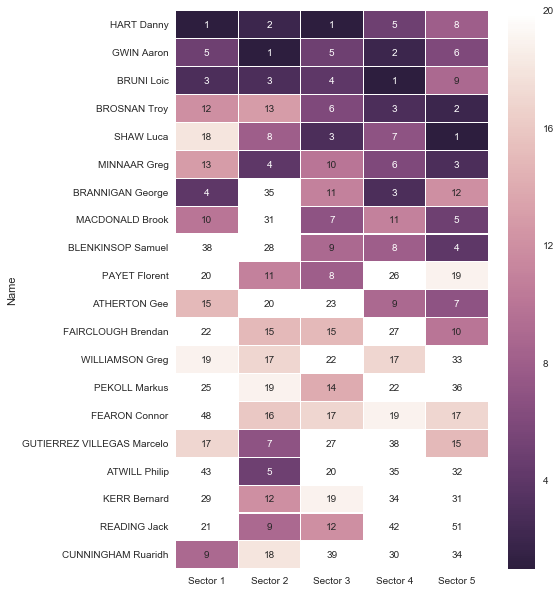

In [21]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d", linewidths=.1, vmin=1, vmax=20, cmap=cmap)
heatmap.figure.savefig('mt_ste_anne_heatmap.png', bbox_inches='tight')

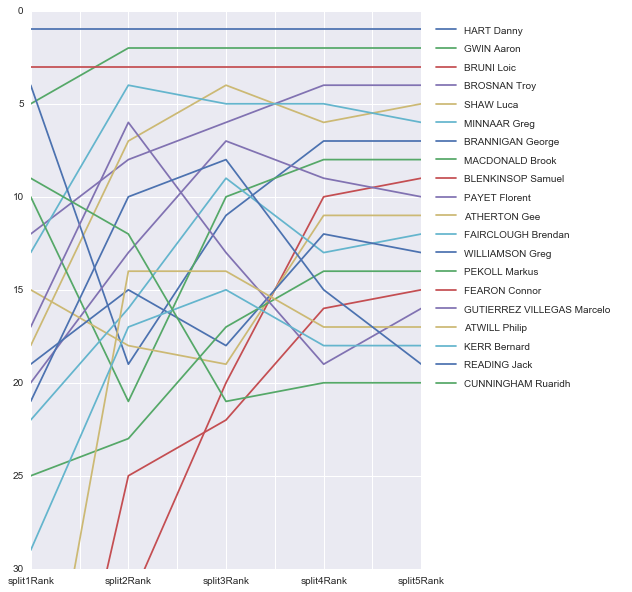

In [25]:
df_splittimes = df[df['split5Rank'] <= 20][['Name', 'split1Rank','split2Rank', 'split3Rank', 'split4Rank', 'split5Rank']]
df_splittimes = df_splittimes.set_index('Name')
df_splittimes = df_splittimes.T

sns.set_style("darkgrid")
df_splittimes.plot()
axes = plt.gca()
axes.set_ylim([0,30])
axes.invert_yaxis()
plt.legend(bbox_to_anchor=(1, 1), labelspacing=0.96, borderpad=1.5, loc=2, borderaxespad=0.)
plt.savefig('mt_ste_anne_positiontracker.png', bbox_inches='tight')

In [19]:
groups = ['split1', 'split2', 'split3','split4','split5','sector1', 'sector2', 'sector3','sector4','sector5']

for group in groups:
    segment = df[['Name', group + 'Rank', group, group + 'Gap']].sort_values(group + 'Rank', ascending=True)[:20]
    cols = ['Name', 'Position', 'Time', 'Gap']
    segment.columns = cols
    segment.to_json(group + '.json', orient='records')

In [26]:
df[df['Name'] == "BLENKINSOP Samuel"].iloc[0]

Rank                              9
Name              BLENKINSOP Samuel
Team           NORCO FACTORY RACING
split1                    00:51.900
split2                    02:07.324
split3                    02:49.442
split4                    03:37.955
split5                    04:06.853
sector1                   00:51.900
sector2                   01:15.424
sector3                   00:42.118
sector4                   00:48.513
sector5                   00:28.898
sector1Gap                    1.998
sector1Rank                      38
sector2Gap                    3.495
sector2Rank                      28
sector3Gap                    1.429
sector3Rank                       9
sector4Gap                    1.166
sector4Rank                       8
sector5Gap                    0.531
sector5Rank                       4
split1Gap                     1.998
split1Rank                       38
split2Gap                     5.181
split2Rank                       32
split3Gap                   